<a href="https://colab.research.google.com/github/istiqomahraa/Praktikum_Machine_Learning/blob/main/raraamachinelearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum I Machine Learning**


**PERTEMUAN I: FEATURE ENGINEERING**

Nama  : Istiqomah Rabithah Alam Islami

NPM : F1F022009


# Latar Belakang

Perkembangan machine learning (ML) beberapa tahun terakhir mendorong perubahan besar dalam berbagai sektor, seperti kesehatan, keuangan, pendidikan, hingga industri. Di Indonesia, penggunaan ML semakin meningkat karena kemampuannya dalam menganalisis data berukuran besar dan menghasilkan prediksi yang lebih akurat untuk mendukung pengambilan keputusan. Berbagai penelitian nasional juga menunjukkan bahwa algoritma ML telah menjadi bagian penting dalam pemecahan masalah yang membutuhkan pendekatan berbasis data (Tanjung, Yahya, & Halim, 2021). Meskipun algoritma ML semakin canggih, performanya sangat bergantung pada kualitas data yang masuk ke dalam model. Oleh karena itu, tahap awal seperti pembersihan data, transformasi variabel, dan rekayasa fitur (feature engineering) perlu dilakukan untuk memastikan model dapat belajar secara optimal. Berbagai studi di Indonesia menegaskan bahwa feature engineering mampu meningkatkan ketepatan prediksi dengan mengurangi noise, memperbaiki struktur data, dan menyoroti variabel prediktor yang penting (Santoso & Priyadi, 2024).

Salah satu teknik penting dalam feature engineering adalah seleksi fitur (feature selection), yaitu proses memilih atribut yang paling relevan untuk meningkatkan performa sekaligus mengurangi kompleksitas model. Penelitian lokal menunjukkan bahwa metode ini efektif diterapkan pada berbagai permasalahan, seperti deteksi botnet pada jaringan komputer, di mana pemilihan fitur tertentu terbukti meningkatkan akurasi algoritma klasifikasi (Khoo & Handoko, 2025). Dalam bidang kesehatan pun, seleksi fitur berperan penting untuk mengurangi variabel tidak signifikan sehingga model prediksi penyakit seperti diabetes menjadi lebih andal (Wantoro et al., 2023). Selain seleksi fitur, berbagai teknik feature engineering lainnya seperti normalisasi, pengkodean, pembuatan fitur baru, serta oversampling juga terbukti mampu meningkatkan kinerja model. Penelitian di Telkom University menunjukkan bahwa kombinasi feature engineering dan hyperparameter tuning memberikan peningkatan signifikan pada akurasi model Random Forest dalam memprediksi risiko kredit (JTI Universitas Brawijaya, 2022).

Lebih jauh, feature engineering tidak hanya meningkatkan performa model tetapi juga membantu interpretasi hasil. Dengan mengetahui fitur mana yang paling berpengaruh, peneliti dan praktikan dapat memahami faktor-faktor utama yang memengaruhi prediksi. Penelitian lain menunjukkan bahwa proses seleksi fitur dapat membantu mengidentifikasi variabel penting dalam mendeteksi risiko mahasiswa putus kuliah sehingga hasil analisis lebih mudah dipahami (Umar, Al Ghozali, & Handoko, 2023).

# Rumusan Masalah

Berdasarkan latar belakang diatas, rumusan masalah yang dapat disimpulkan adalah:
1. Bagaimana konsep dari berbagai jenis feature engineering pada Python?
2. Bagiamana cara melakukan teknik feature engineering di program Python?

# Tujuan Penelitian

Berdasarkan rumusan masalah di atas, tujuan penelitian yang akan dicapai adalah:
1. Dapat memahami konsep dari berbagai jenis feature engineering pada Python.
2. Dapat melkukan teknik feature engineering di program Python.

# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [2]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 7.3 MB/s eta 0:00:00


In [50]:
# Define Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#Encoding
from sklearn.preprocessing import OneHotEncoder

#Handling Outlier
from feature_engine.outliers import Winsorizer

#Balancing Data
from imblearn.over_sampling import SMOTE

#model ML
from sklearn.linear_model import LogisticRegression

#model performence
from sklearn.metrics import classification_report, f1_score

from sklearn.impute import SimpleImputer ##Imputasi Simple berdasarkan modus
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer## Imputasi MICE

# Memuat Data

Sebelum kita membahas lebih jauh tentang Feature Engineering, berikut ini adalah beberapa dataset yang akan digunakan untuk memperjelas tujuan dari notebook ini.

In [51]:
# Load penelitian Dataset

df_ori = pd.read_csv('https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/data_penelitian.csv', sep=';')
data_pt1 = df_ori.copy()
data_pt1.head(10)

,Hujan,Suhu Udara,Kelembapan,Keadaan Cuaca,Kecepatan Angin
0,1,23.0,95,5.0,NaN
1,1,24.0,90,1.0,NaN
2,1,26.8,77,1.0,NaN
3,1,29.6,62,2.0,2.0
4,1,30.8,56,1.0,7.0
5,1,31.0,55,1.0,7.0
6,1,30.4,57,3.0,9.0
7,2,30.9,58,2.0,10.0
8,2,30.2,62,2.0,8.0
9,2,29.7,62,2.0,7.0


In [52]:
# Melihat dimensi data
data_pt1.shape

(743, 5)

In [53]:
#melihat tipe data
data_pt1.dtypes

,0
Hujan,int64
Suhu Udara,float64
Kelembapan,int64
Keadaan Cuaca,float64
Kecepatan Angin,float64


# Analisis Data Eksploratif

Untuk mengenal data lebih dalam, dilakukan eksplorasi pada data.

In [54]:
# Statistik deskriptif
print("\n=== Statistik Deskriptif (Numerik) ===")
print(data_pt1.describe())


=== Statistik Deskriptif (Numerik) ===
            Hujan  Suhu Udara  Kelembapan  Keadaan Cuaca  Kecepatan Angin
count  743.000000  743.000000  743.000000     734.000000       429.000000
mean     1.779273   26.540915   83.881561      15.107629         6.655012
std      0.415016    2.557152   11.561250      24.923088         3.352688
min      1.000000   22.600000   52.000000       1.000000         2.000000
25%      2.000000   24.300000   75.000000       2.000000         4.000000
50%      2.000000   26.000000   86.000000       2.000000         6.000000
75%      2.000000   28.900000   94.000000      15.000000         9.000000
max      2.000000   32.000000  100.000000      97.000000        21.000000


# _Feature Engineering_

## A - Missing Value

Data hilang (***missing data***) atau nilai hilang (***missing values***) terjadi ketika tidak ada data atau nilai yang tersimpan untuk suatu observasi pada variabel tertentu.

Kehilangan data adalah hal yang sering terjadi, baik dalam kompetisi data science maupun di dunia bisnis, dan dapat mempengaruhi kesimpulan yang diambil dari data tersebut. **Data yang tidak lengkap merupakan masalah yang tidak bisa dihindari saat bekerja dengan berbagai sumber data.**

---
### - Kenapa data hilang (data missing)?

Ada berbagai alasan mengapa data bisa hilang, antara lain:
* Nilai bisa **hilang** atau **tidak tersimpan dengan benar** saat proses pengumpulan data.
  
  Misalnya, data berasal dari survei yang diisi secara manual ke dalam formulir online. Petugas entri data bisa saja lupa mengisi satu kolom dalam formulir tersebut, sehingga nilai pada kolom itu menjadi hilang.

* **Nilai memang tidak ada.**

  Contohnya: untuk variabel yang dihitung dari hasil pembagian antara dua variabel, seperti rasio utang terhadap pendapatan. Jika seseorang tidak memiliki pendapatan, maka nilai rasio tersebut tidak dapat dihitung karena pembagian dengan nol tidak terdefinisi.


* Data hilang juga bisa terjadi karena **responden menolak menjawab** pertanyaan tertentu dalam formulir.
  
  Misalnya, seseorang mungkin enggan mengungkapkan jumlah pendapatannya. Akibatnya, nilai untuk variabel “pendapatan” akan menjadi hilang bagi orang tersebut.

Selain memahami penyebab hilangnya data, **penting juga untuk memahami mekanisme bagaimana nilai-nilai yang hilang itu muncul dalam dataset**.
Tergantung pada mekanismenya, kita bisa memilih untuk memproses nilai yang hilang dengan cara yang berbeda. Selain itu, dengan mengetahui sumber data yang hilang, kita juga bisa mengambil langkah untuk mengendalikan sumber tersebut, dan mengurangi jumlah data yang hilang di masa depan selama proses pengumpulan data.

In [55]:
# Check Missing Values

data_pt1.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,9
Kecepatan Angin,314


In [56]:
# Check Missing Values as Percentage to Total Data

data_pt1.isnull().mean()

,0
Hujan,0.000000
Suhu Udara,0.000000
Kelembapan,0.000000
Keadaan Cuaca,0.012113
Kecepatan Angin,0.422611


In [57]:
#Missing value kolom Keadaan Cuaca
data_pt1[data_pt1['Keadaan Cuaca'].isnull()].head(10)

,Hujan,Suhu Udara,Kelembapan,Keadaan Cuaca,Kecepatan Angin
41,2,26.0,92,NaN,NaN
206,1,23.8,98,NaN,5.0
309,1,23.3,97,NaN,NaN
511,2,28.8,79,NaN,12.0
597,2,24.6,92,NaN,NaN
638,1,22.8,98,NaN,4.0
674,2,25.5,96,NaN,NaN
722,2,27.0,80,NaN,4.0
724,2,31.0,57,NaN,6.0


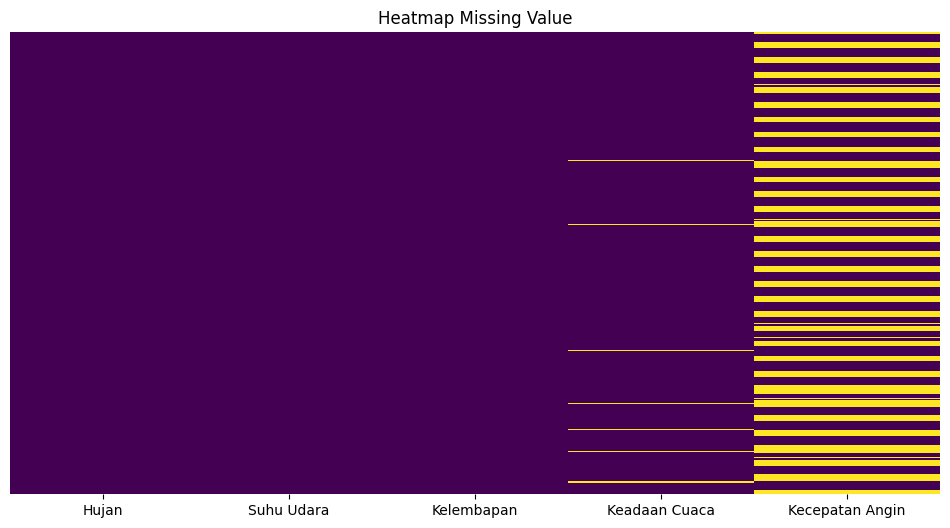

In [58]:
plt.figure(figsize=(12, 6))
sns.heatmap(data_pt1.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap Missing Value')
plt.show()

### Penanganan Data Missing

#### -Drop Missing Data

In [59]:
#Drop
data_pt1_dropna=data_pt1.dropna()
data_pt1_dropna.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,0
Kecepatan Angin,0


In [60]:
data_pt1_dropna.shape

(424, 5)

#### -Imputasi Missing Data

In [61]:
#Imputasi Maju
# 'ffill' = forward fill
df_imp1=data_pt1.copy()
df_imp1['Keadaan Cuaca'] = df_imp1['Keadaan Cuaca'].fillna(method='ffill')
#'bfill' = backward fill
#df_imp1['Keadaan Cuaca'] = df_imp1['Keadaan Cuaca'].fillna(method='bfill')
df_imp1.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,0
Kecepatan Angin,314


In [62]:
df_imp1.iloc[41]

,41
Hujan,2.0
Suhu Udara,26.0
Kelembapan,92.0
Keadaan Cuaca,2.0
Kecepatan Angin,NaN


In [63]:
df_imp2=data_pt1.copy()
# Hitung nilai mean
mean_value = df_imp2['Kecepatan Angin'].mean()

# Isi NaN dengan mean
df_imp2['Kecepatan Angin'] = df_imp2['Kecepatan Angin'].fillna(mean_value)
df_imp2.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,9
Kecepatan Angin,0


In [64]:
df_imp3=data_pt1.copy()
# Hitung nilai median
median_value = df_imp3['Kecepatan Angin'].median()

# Isi NaN dengan median
df_imp3['Kecepatan Angin'] = df_imp3['Kecepatan Angin'].fillna(median_value)
df_imp3.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,9
Kecepatan Angin,0


In [65]:
df_imp4=data_pt1.copy()

# Isi NaN dengan interpolasi
df_imp4['Keadaan Cuaca'] = df_imp4['Keadaan Cuaca'].interpolate(method='linear')
df_imp4.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,0
Kecepatan Angin,314


In [68]:
median_value = df_imp4['Kecepatan Angin'].median()
# Isi NaN dengan median
df_imp4['Kecepatan Angin'] = df_imp4['Kecepatan Angin'].fillna(median_value)
df_imp4.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,0
Kecepatan Angin,0


## B - Kardinalitas

In [69]:
df_imp4.head(10)

,Hujan,Suhu Udara,Kelembapan,Keadaan Cuaca,Kecepatan Angin
0,1,23.0,95,5.0,6.0
1,1,24.0,90,1.0,6.0
2,1,26.8,77,1.0,6.0
3,1,29.6,62,2.0,2.0
4,1,30.8,56,1.0,7.0
5,1,31.0,55,1.0,7.0
6,1,30.4,57,3.0,9.0
7,2,30.9,58,2.0,10.0
8,2,30.2,62,2.0,8.0
9,2,29.7,62,2.0,7.0


In [70]:
df_imp4['Keadaan Cuaca'].unique()

array([ 5. ,  1. ,  2. ,  3. , 14. , 60. , 61. , 21. , 29. , 10. , 16. ,
       62. , 63. , 65. , 15. , 17. , 13. , 95. , 91. , 49. , 97. , 56. ,
        1.5])

In [71]:
#Mengurangi Kardinalitas

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
### 2. Tentukan Label untuk Setiap Bin
# 10 label (0 s/d 9)
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### 3. Terapkan pd.cut
df_imp4['Keadaan_Cuaca_reduced'] = pd.cut(
    df_imp4['Keadaan Cuaca'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

### 4. Verifikasi
print("--- Hasil Perbandingan ---")
# Menampilkan 10 data acak untuk melihat perubahannya
print(df_imp4.sample(10))

print("\n--- Pengecekan Kardinalitas ---")
print('Jumlah kategori di "Keadaan Cuaca" asli : {}'.format(len(df_imp4['Keadaan Cuaca'].unique())))
print('Jumlah kategori di "Keadaan_Cuaca_reduced" : {}'.format(len(df_imp4['Keadaan_Cuaca_reduced'].unique())))

print("\nKategori unik yang baru (reduced):")
print(df_imp4['Keadaan_Cuaca_reduced'].unique())

--- Hasil Perbandingan ---
     Hujan  Suhu Udara  Kelembapan  Keadaan Cuaca  Kecepatan Angin  \
529      2        24.3          90           60.0              4.0   
170      2        26.6          83            1.0              2.0   
196      2        28.9          74            2.0              8.0   
77       1        27.8          79           61.0              6.0   
95       2        24.2          93           14.0              6.0   
435      2        27.7          80            2.0              2.0   
190      2        22.8          97            2.0              6.0   
351      1        25.4          90            2.0              5.0   
313      2        25.0          93            3.0              5.0   
183      1        22.6          95           61.0              9.0   

    Keadaan_Cuaca_reduced  
529                     5  
170                     0  
196                     0  
77                      6  
95                      1  
435                     0  
190   

## C- Splitting Data

In [72]:
#mendeskripsikan variabel X dan y
df_imp4=df_imp4.drop('Keadaan Cuaca', axis = 1)
X= df_imp4.drop('Hujan', axis = 1)
y=df_imp4['Hujan']

In [73]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=200, shuffle= False)

In [74]:
#X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=200, shuffle= True)
#X_train.shape

In [75]:
#X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=200, stratify=y)
#X_test.shape

## D- Handling Outlier

In [76]:
#buat list fitur numerik
list_num = ['Suhu Udara', 'Kelembapan', 'Kecepatan Angin']
# Hitung IQR
list_outlier=[]
list_lower_bound =[]
list_upper_bound =[]
for i in X_train[list_num]:
    Q1 = np.percentile(X_train[i], 25)
    Q3 = np.percentile(X_train[i], 75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    list_lower_bound.append(lower_bound)
    list_upper_bound.append(upper_bound)

    # Hitung jumlah outlier di bawah batas bawah dan di atas batas atas
    num_outliers_lower = np.sum(X_train[i] < lower_bound)
    num_outliers_upper = np.sum(X_train[i] > upper_bound)

    # Jumlah total outlier
    total_outliers = num_outliers_lower + num_outliers_upper
    list_outlier.append(total_outliers)

#Mendefinikan dataframe baru mengenai outliers
outliers = pd.DataFrame()
outliers['Kolom'] = list_num
outliers['Jumlah Outlier'] = list_outlier
outliers['Lower Bound'] = list_lower_bound
outliers['Upper Bound'] = list_upper_bound
outliers

,Kolom,Jumlah Outlier,Lower Bound,Upper Bound
0,Suhu Udara,0,18.15,35.35
1,Kelembapan,0,48.00,120.00
2,Kecepatan Angin,57,2.00,10.00


Dari hasil analisa diketahui bahwa 1 kolom fitur memiliki outlier pada data dengan jumlah yang besar.

In [77]:
#mendefinisikan kolom yang digunakan dan list tempat value skewness
df_num = X_train[list_num]
nilai_skew = []
nilai_skew_normal = []

#membuat fungsi untuk memetakan distribusi setiap kolom
for i in df_num.columns:
    skewness = X_train[i].skew()
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(i)
    else:
        nilai_skew.append(i)

# Menampilkan list
print('kolom yang mempunyai nilai skewness sedang:', nilai_skew)
print('kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

kolom yang mempunyai nilai skewness sedang: ['Kelembapan', 'Kecepatan Angin']
kolom yang mempunyai nilai skewness normal: ['Suhu Udara']


Setelah dilihat sebaran datanya, diketahui bahwa kolom fitur kecepatan angin berdistribusi skew

#### Trimming

In [78]:
outliers_indexed = outliers.set_index('Kolom')
# Ambil nilai lower dan upper berdasarkan indeks 'Kecepatan Angin'
lower_kecepatan = outliers_indexed.loc['Kecepatan Angin', 'Lower Bound']
upper_kecepatan = outliers_indexed.loc['Kecepatan Angin', 'Upper Bound']

# Flag the outliers in category
outliers_KecepAngin = np.where(X_train['Kecepatan Angin'] > upper_kecepatan, True,
                       np.where(X_train['Kecepatan Angin'] < lower_kecepatan, True, False))


# Trimming the dataset
X_train_trimmed1 = X_train.loc[~(outliers_KecepAngin)]

print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_trimmed1.shape)

Size dataset - Before trimming :  (594, 4)
Size dataset - After trimming  :  (537, 4)


#### Capping

In [79]:
# Capping the skew distribution

winsoriser_Kecepatan_Angin = Winsorizer(capping_method='iqr', #gaussian for normal distribution
                            tail='both',
                            fold=1.5,
                            variables=['Kecepatan Angin'],
                            missing_values='ignore')

X_train_capped = winsoriser_Kecepatan_Angin.fit_transform(X_train)
X_test_capped = winsoriser_Kecepatan_Angin.transform(X_test)

#### visualisasi

In [80]:
#Defining a function to create histogram and box plot for certain variables
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, color='teal')
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable], color='teal')
    plt.title('Boxplot')

    plt.show()

Suhu Udara - Before Capping


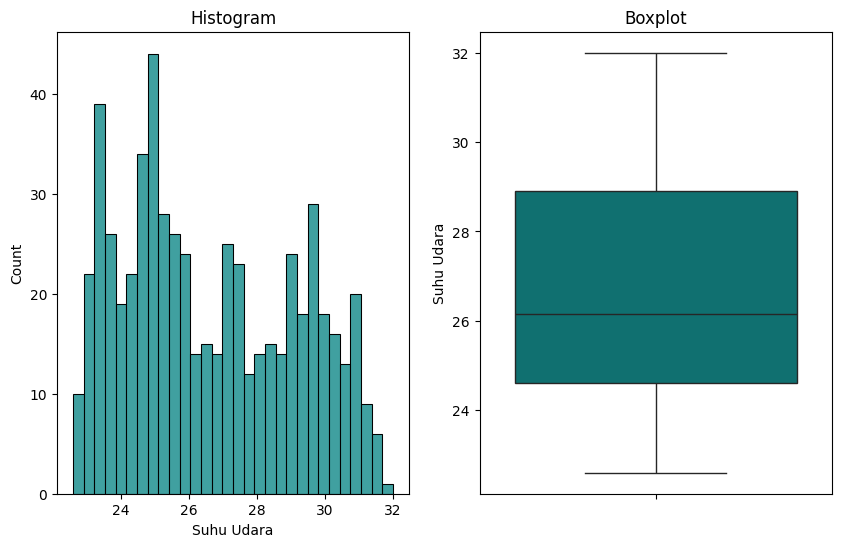


Suhu Udara - After Capping


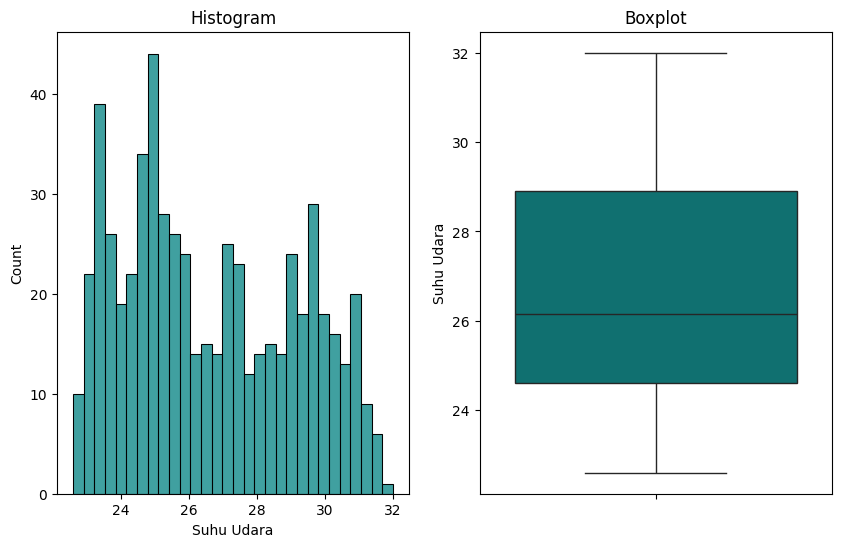

Kelembapan - Before Capping


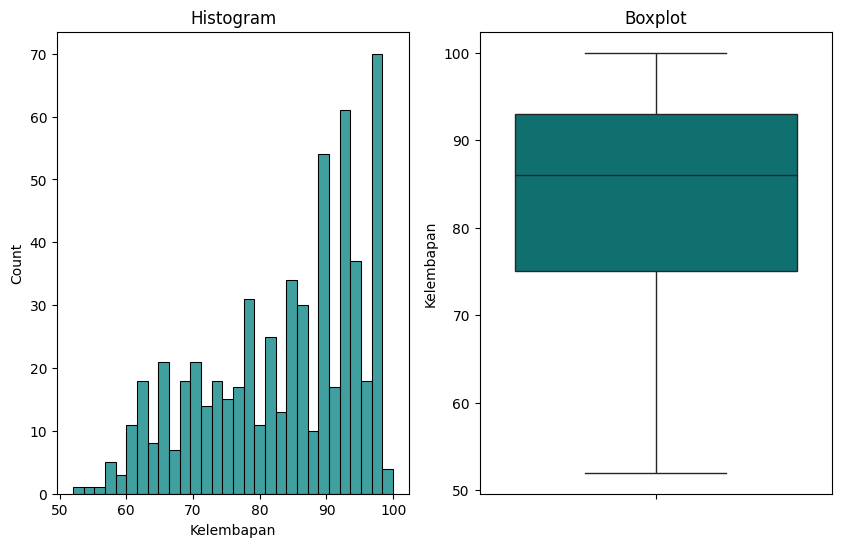


Kelembapan - After Capping


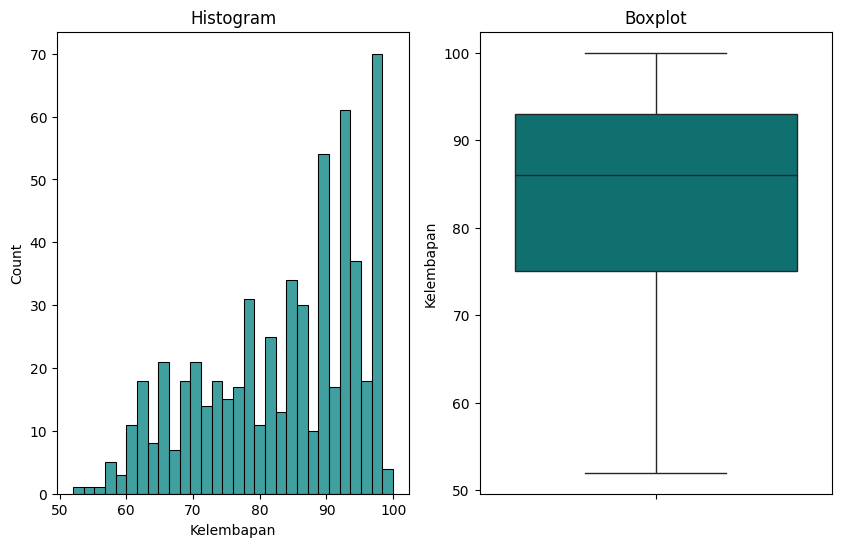

Kecepatan Angin - Before Capping


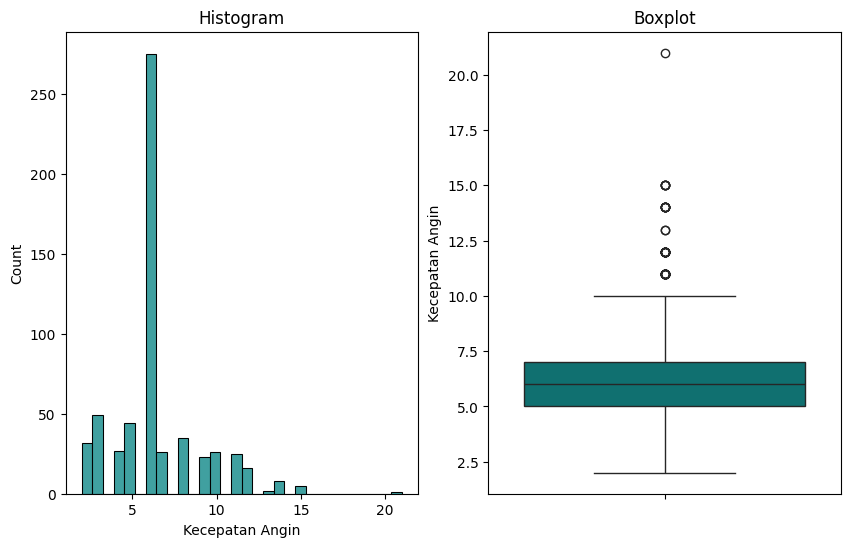


Kecepatan Angin - After Capping


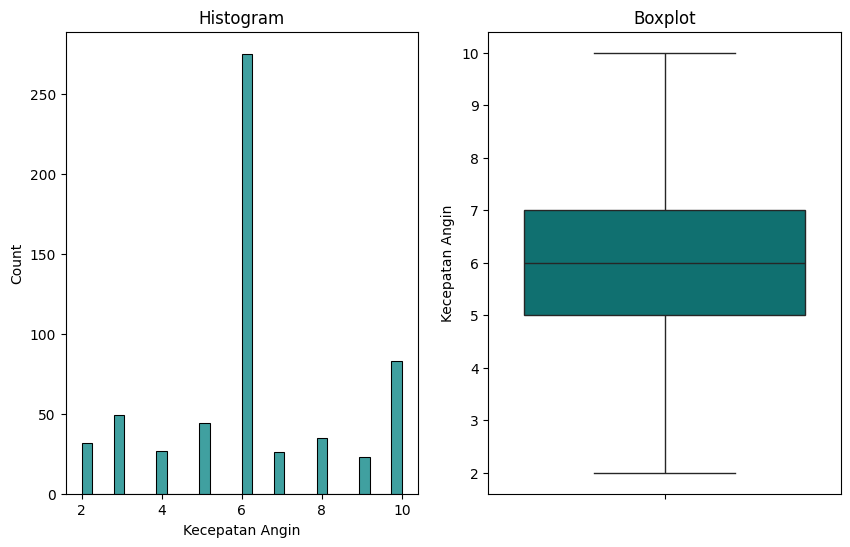

In [30]:
# Plotting histogram and boxplot before and after capping
for col in list_num:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)


## E- Scaling

In [81]:
#mendefinisikan kolom yang digunakan dan list tempat value skewness
nilai_skew = []
nilai_skew_normal = []

#membuat fungsi untuk memetakan distribusi setiap kolom
for i in df_num.columns:
    skewness = X_train_capped[i].skew()
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(i)
    else:
        nilai_skew.append(i)

# Menampilkan list
print('kolom yang mempunyai nilai skewness sedang:', nilai_skew)
print('kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

kolom yang mempunyai nilai skewness sedang: ['Kelembapan']
kolom yang mempunyai nilai skewness normal: ['Suhu Udara', 'Kecepatan Angin']


In [82]:
#melakukan scalling menggunakan standard scaller
standard_scaler = StandardScaler()
standard_scaler.fit(X_train_capped[nilai_skew_normal])
X_train_capped[nilai_skew_normal] = standard_scaler.transform(X_train_capped[nilai_skew_normal])
X_test_capped[nilai_skew_normal] = standard_scaler.transform(X_test_capped[nilai_skew_normal])

In [83]:
#melakukan scalling menggunakan robust scaller
robust_scaler = RobustScaler()
robust_scaler.fit(X_train_capped[nilai_skew])
X_train_capped[nilai_skew] = robust_scaler.transform(X_train_capped[nilai_skew])
X_test_capped[nilai_skew] = robust_scaler.transform(X_test_capped[nilai_skew])

In [84]:
X_train_scale = X_train_capped
X_test_scale = X_test_capped

## F- Encoding

### One Hot Encoder

In [85]:
list_cat = ['Keadaan_Cuaca_reduced']

encoder = OneHotEncoder()

#melakukan encoding
X_train_encoded = encoder.fit_transform(X_train_scale[list_cat])
X_test_encoded = encoder.transform(X_test_scale[list_cat])

### Ordinal Encoder

In [86]:
# lis_ord = ['smoker']
# smoker_cat = ['no', 'yes'] #mengatur urutan
# ord_enc = OrdinalEncoder(categories= [smoker_cat]) #mendefinisikan fungsi encoding

# #melakukan encoding
# X_train_select[lis_ord] = ord_enc.fit_transform(X_train_select[['smoker']])
# X_test_select[lis_ord] = ord_enc.transform(X_test[['smoker']])

## G- Balancing Data

In [87]:
y_train.value_counts()

,count
Hujan,
2,461
1,133


In [88]:
# Oversampling with SMOTE

smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)     # Minority Class will have same the same number as the majority class
# smote = SMOTE(sampling_strategy={1:1000}, k_neighbors=5, random_state=42)     # Minority Class will have 1000 data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train)
y_train_balanced.value_counts()

,count
Hujan,
1,461
2,461


# _Training Model_

In [89]:
#tanpa feature engineering
lr_1 = LogisticRegression()
lr_1.fit(X_train, y_train)

LogisticRegression()

In [90]:
#dengan feature engineering
lr_2 = LogisticRegression()
lr_2.fit(X_train_encoded, y_train)

LogisticRegression()

In [91]:
#dengan feature engineering dan balancing data
lr_3 = LogisticRegression()
lr_3.fit(X_train_balanced, y_train_balanced)

LogisticRegression()

# _Model Performance_

In [92]:
# Check Results - without Handling

print(classification_report(y_train, lr_1.predict(X_train)))
print(classification_report(y_test, lr_1.predict(X_test)))

              precision    recall  f1-score   support

           1       0.46      0.10      0.16       133
           2       0.79      0.97      0.87       461

    accuracy                           0.77       594
   macro avg       0.63      0.53      0.52       594
weighted avg       0.72      0.77      0.71       594

              precision    recall  f1-score   support

           1       0.56      0.32      0.41        31
           2       0.84      0.93      0.88       118

    accuracy                           0.81       149
   macro avg       0.70      0.63      0.65       149
weighted avg       0.78      0.81      0.78       149



In [93]:
# Check Results - with Handling

print(classification_report(y_train, lr_2.predict(X_train_encoded)))
print(classification_report(y_test, lr_2.predict(X_test_encoded)))

              precision    recall  f1-score   support

           1       0.59      0.27      0.37       133
           2       0.82      0.95      0.88       461

    accuracy                           0.79       594
   macro avg       0.70      0.61      0.62       594
weighted avg       0.77      0.79      0.76       594

              precision    recall  f1-score   support

           1       0.60      0.19      0.29        31
           2       0.82      0.97      0.89       118

    accuracy                           0.81       149
   macro avg       0.71      0.58      0.59       149
weighted avg       0.77      0.81      0.76       149



In [94]:
# Check Results - with Handling

print(classification_report(y_train_balanced, lr_3.predict(X_train_balanced)))
print(classification_report(y_test, lr_3.predict(X_test_encoded)))

              precision    recall  f1-score   support

           1       0.79      0.37      0.51       461
           2       0.59      0.90      0.71       461

    accuracy                           0.64       922
   macro avg       0.69      0.64      0.61       922
weighted avg       0.69      0.64      0.61       922

              precision    recall  f1-score   support

           1       0.55      0.55      0.55        31
           2       0.88      0.88      0.88       118

    accuracy                           0.81       149
   macro avg       0.71      0.71      0.71       149
weighted avg       0.81      0.81      0.81       149



**Interpretasi:**

Berdasarkan hasil model tanpa handling (Baseline model), model menunjukkan kinerja yang baik pada kelas mayoritas (2), terlihat dari precision dan recall yang tinggi pada data training maupun testing. Namun, model masih kesulitan mendeteksi kelas minoritas (1). Hal ini tampak dari recall kelas 1 yang sangat rendah pada data training yaitu sebesar 0,10 dan masih rendah pada data testing yang sebesar 0,32, sehingga menghasilkan F1-score yang kecil. Walaupun akurasi keseluruhan tampak tinggi sebesar 0,77 pada training dan 0,81 pada testing, angka ini sebenarnya kurang mencerminkan performa model karena adanya ketidakseimbangan kelas dengan model lebih sering menebak kelas 2. Secara umum, model masih bias terhadap kelas mayoritas dan belum mampu mengklasifikasikan kedua kelas secara seimbang.

Selanjutnya, berdasarkan hasil model dengan handling, model menunjukkan pola yang mirip dengan sebelumnya, yaitu performa yang jauh lebih baik pada kelas mayoritas (2) dibandingkan kelas minoritas (1). Pada data training, kelas 2 memiliki precision dan recall tinggi yaitu masing-masing 0,82 dan 0,95, menghasilkan F1-score 0,8, sedangkan kelas 1 hanya mencapai recall 0.27 dan F1-score 0,37. Pola ini tetap terlihat pada data testing, di mana kelas 2 kembali memperoleh F1-score tinggi (0,89), sementara kelas 1 masih lemah dengan recall 0.19 dan F1-score 0,29. Meskipun akurasi model terlihat cukup baik yaitu 0,79 pada train dan 0,81 pada test, nilai ini tidak menggambarkan performa sebenarnya karena ketidakseimbangan jumlah data antar kelas. Secara keseluruhan, model tetap bias terhadap kelas mayoritas dan belum mampu mengenali kelas minoritas secara optimal.

Sedangkan pad amodel ketiga, yaitu model dengan handling dan balancing menunjukkan perubahan performa yang lebih seimbang antara kedua kelas. Pada data training, kelas 1 kini memiliki precision 0,79 dan F1-score 0,51, meskipun recall masih relatif rendah yaitu 0.37. Sebaliknya, kelas 2 memperoleh recall sangat tinggi sebesar 0,90 dengan F1-score 0,71. Hal ini menunjukkan bahwa balancing membuat model tidak lagi terlalu bias ke salah satu kelas, meskipun *trade-off* terjadi pada penurunan precision kelas 2. Pola serupa muncul pada data testing, di mana kelas 1 dan kelas 2 memiliki nilai recall dan F1-score yang seimbang yaitu keduanya 0,55 untuk kelas 1 dan 0,88 untuk kelas 2. Akurasi keseluruhan tetap cukup baik, yaitu 0,81, namun kini lebih mencerminkan performa model yang adil antar kelas. Secara keseluruhan, balancing berhasil membuat kemampuan model lebih stabil dan meningkatkan deteksi kelas minoritas tanpa menurunkan performa secara signifikan pada kelas mayoritas.

# Kesimpulan

Berdasarkan hasil yang didapatkan, dapat disimpulkan bahwa langkah awal untuk meningkatkan kinerja model adalah menangani data hilang melalui proses imputasi. Untuk variabel numerik seperti Kecepatan Angin, digunakan IterativeImputer dengan metode Multiple Imputation by Chained Equations (MICE). Metode ini mengisi nilai kosong secara bertahap dengan memanfaatkan keterkaitan antarvariabel lain, sehingga estimasi yang diperoleh lebih akurat dan konsisten. Sementara itu, untuk variabel kategorik Keadaan Cuaca diterapkan SimpleImputer dengan strategi modus, yaitu menggantikan nilai hilang dengan kategori yang paling sering muncul agar pola distribusi data tetap terjaga. Setelah proses imputasi selesai, seluruh nilai hilang telah terisi sesuai tipe variabelnya, sehingga dataset siap digunakan pada tahap pemodelan berikutnya.

Tahap selanjutnya adalah membagi data menggunakan fungsi train_test_split dengan test_size=0.2, random_state=200, dan shuffle=False. Sebanyak 80% data dialokasikan untuk pelatihan model, sedangkan 20% sisanya dipakai untuk pengujian. Parameter random_state=200 memastikan pembagian data yang konsisten setiap kali kode dijalankan, dan shuffle=False dipilih karena data memiliki urutan waktu, sehingga tidak terjadi perubahan pada struktur kronologisnya. Dengan pembagian ini, model dapat belajar dari data historis dan diuji pada periode berikutnya, sehingga menghindari data leakage dan menghasilkan evaluasi performa yang lebih objektif serta realistis.

Ketiga model menunjukkan perbedaan performa yang jelas terkait pengaruh ketidakseimbangan data. Pada model pertama (tanpa encoding tambahan (handling) maupun balancing), performa sangat bias ke kelas mayoritas dengan recall kelas 1 sangat rendah, sehingga F1-score kelas minoritas pun rendah meskipun akurasi terlihat tinggi. Model kedua (dengan encoding tambahan namun tetap tanpa balancing) hanya memberikan sedikit perbaikan—precision kelas 1 meningkat, tetapi recall tetap rendah dan bias terhadap kelas 2 masih kuat. Baru pada model ketiga (menggunakan data yang telah diseimbangkan), performa antar kelas menjadi lebih seimbang, terlihat dari nilai recall dan F1-score yang lebih merata antara kelas 1 dan kelas 2, serta akurasi tetap stabil. Dengan demikian, balancing terbukti paling efektif dalam meningkatkan kemampuan model menangani kelas minoritas, menghasilkan model yang lebih adil dan representatif dibanding dua pendekatan sebelumnya. Secara keseluruhanm proses feature engineering yang dilakukan memiliki pondasi kuat untuk membangun model klasifikasi yang lebih baik pada data yang tidak seimbang.


# Referensi

JTI Universitas Brawijaya. (2022). Penerapan Feature Engineering dan Hyperparameter Tuning pada Prediksi Risiko Kredit. *Jurnal Teknologi Informasi dan Ilmu Komputer (JTI-IK)*.

Khoo, R., & Handoko, K. (2025). Analisis Perbandingan Kinerja Algoritma Machine Learning Berbasis Feature Selection dalam Deteksi Serangan Botnet. *COMASIE (Computer and Science Industrial Engineering)*, 12(2), 139–148.

Santoso, L., & Priyadi, P. (2024). Comparative Study of Feature Engineering Techniques for Predictive Data Analytics. *Journal of Technology Informatics and Engineering*, 3(2), 417-435.

Tanjung, S. Y., Yahya, K., & Halim, S. (2021). Predicting the Readiness of Indonesia Manufacturing Companies toward Industry 4.0: A Machine Learning Approach. *Jurnal Teknik Industri*, 23(1), 1–10.

Umar, U., Al Ghozali, I. H., & Handoko, A. R. (2023). Analisis Efektifitas Feature Selection dalam Pengkayaan Machine Learning untuk Deteksi Dini Risiko Putus Kuliah Mahasiswa. *JEPIN (Jurnal Edukasi dan Penelitian Informatika)*.

Wantoro, A., Zulkifli, Z., Yulia, A. F., Ayu, D. Y., & Mustofa, S. (2023). Evaluasi Kinerja Algoritma Machine Learning Menggunakan Seleksi Fitur pada Klasifikasi Diabetes. *Jurnal Informatika Polinema*.
